# PipeLine
This notebook is used to:
1. Gather and merge all the data scraped and extract features from them.
2. Train machine learning model and do model analysis

In [1]:
# Import basic packages
import os
import pandas as pd
from InvestorDataFrame import InvestorDataFrame
# Import feature extraction function
from FeatureExtraction import punctuated_rake, merge_dataframe, get_investors_list
from FeatureExtraction import get_time_interval, get_sentiment, get_similarity_keyword, get_network_centrality
# Set Path
DATA_PATH = './data/'
DATA_PATH_FEA = './data/feature/'

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Loading model parameters...
Building model...
Loading word2vector model...
Done!


In [2]:
# Get the list of investor
investors = get_investors_list(True)
investors = [i for i in investors if os.path.exists(DATA_PATH_FEA + i.replace(' ', '_') + '_youtube_feature.csv')]

# Feature extraction
## 1. Extract Text Feature

In [3]:
# Load the data, extract text feature
text_feature_df= pd.DataFrame(columns=['Investor','Domain', \
                                       'Money_Raised', \
                                       'posSentNum', 'negSentNum', 'posSentScore', 'negSentScore', \
                                       'Similarity', 'rakeKeywordsFreq', 'Time_Interval_Month'])
invest_domain_list = []
for investor in investors:
        text_fea_file = DATA_PATH_FEA + investor.replace(' ', '_') + '_text_features.csv'
        if os.path.exists(text_fea_file):
            investor_df = pd.read_csv(text_fea_file, index_col=0)

        else:
            IDFrame = InvestorDataFrame(investor)
            # Punctuate the caption text and extract rake keywords
            investor_df = punctuated_rake(IDFrame)
            # Compute sentiment scores for caption text
            investor_df = get_sentiment(investor_df)
            # Merge feature and label(investment domain and amount)
            investor_df = merge_dataframe(IDFrame, investor_df)
            # Compute time interval between interview and investment
            investor_df = get_time_interval(investor_df).reset_index(drop=True)
            # Calculate similarity between the keywords and investment domain
            investor_df = get_similarity_keyword(investor_df)
            # Add a column of investor name
            investor_df['Investor'] = investor
            # Save it to local
            investor_df.to_csv(text_fea_file)

        print('{}: Textual features Loaded!'.format(investor))
        # Prepare the data for network adjacency matrix
        if investor_df.shape[0] != 0:
            domain_series = pd.value_counts(investor_df['Domain'].unique()) 
            invest_domain_list.append(domain_series.rename(investor))
            # Append to the entire textual feature dataframe
            text_feature_df = pd.concat([text_feature_df, investor_df], join='inner')

Bill Gurley: Textual features Loaded!
Jim Goetz: Textual features Loaded!
Mary Meeker: Textual features Loaded!
Peter Fenton: Textual features Loaded!
Josh Kopelman: Textual features Loaded!
Douglas Leone: Textual features Loaded!
Brian Singerman: Textual features Loaded!
Scott Sandell: Textual features Loaded!
Roelof Botha: Textual features Loaded!
JP Gan: Textual features Loaded!
Rob Hayes: Textual features Loaded!
Jeff Jordan: Textual features Loaded!
Dennis Phelps: Textual features Loaded!
Neeraj Agrawal: Textual features Loaded!
Neil Shen: Textual features Loaded!
Xiaojun Li: Textual features Loaded!
Steve Anderson: Textual features Loaded!
Kui Zhou: Textual features Loaded!
Marc Andreessen: Textual features Loaded!
Sameer Gandhi: Textual features Loaded!
Alfred Lin: Textual features Loaded!
Tony Florence: Textual features Loaded!
John Doerr: Textual features Loaded!
Vinod Khosla: Textual features Loaded!
Deven Parekh: Textual features Loaded!
Jeremy Liew: Textual features Loaded!

David Lee: Textual features Loaded!
Josh Goldman: Textual features Loaded!
Max Niederhofer: Textual features Loaded!
Phineas Barnes: Textual features Loaded!
Alan Spoon: Textual features Loaded!
Albert Wenger: Textual features Loaded!
Alex Ferrara: Textual features Loaded!
Andy Weissman: Textual features Loaded!
Bill Harding: Textual features Loaded!
Brian Frank: Textual features Loaded!
David Jegen: Textual features Loaded!
Gyan Kapur: Textual features Loaded!
Helen Wong: Textual features Loaded!
Jeff Bussgang: Textual features Loaded!
John Cadeddu: Textual features Loaded!
Siraj Khaliq: Textual features Loaded!
Boris Wertz: Textual features Loaded!
Chris Fralic: Textual features Loaded!
Cindy Padnos: Textual features Loaded!
Daniel Cohen: Textual features Loaded!
Doug Renert: Textual features Loaded!
Eric Chin: Textual features Loaded!
Gary Swart: Textual features Loaded!
Geoff Yang: Textual features Loaded!
Joe Lonsdale: Textual features Loaded!
Jonathan Teo: Textual features Loaded

In [4]:
text_feature_df.head()

,Investor,Domain,Money_Raised,posSentNum,negSentNum,posSentScore,negSentScore,Similarity,rakeKeywordsFreq,Time_Interval_Month
0,Bill Gurley,Dental,$21M,0.495292,0.113622,0.451702,-0.355453,0.059242,0.001997,42
1,Bill Gurley,Dental,$21M,0.428571,0.128571,0.502273,-0.421981,0.117874,0.008618,19
2,Bill Gurley,Dental,$21M,0.549528,0.063679,0.502241,-0.327293,0.064146,0.012512,3
3,Bill Gurley,Dental,$21M,0.466258,0.092025,0.494955,-0.368167,0.088350,0.002132,19
4,Bill Gurley,Dental,$21M,0.323671,0.149758,0.469031,-0.391197,0.077429,0.013956,15


## 2. Extract Network Feature

In [5]:
domain_nx_df   = pd.concat(invest_domain_list, axis=1).fillna(0)
investor_nx_df = domain_nx_df.T

In [6]:
# Domain network feature
dom_nx_df = get_network_centrality(domain_nx_df, 'Domain',  'VectorDistance')
dom_nx_df.head()

,Domain_degree_centrality,Domain_betweenness_centrality,Domain_closeness_centrality
3D Printing,0.831395,0.000007,0.365082
3D Technology,0.808827,0.000009,0.357561
A/B Testing,0.808143,0.000009,0.358076
Accounting,0.829848,0.000007,0.365129
Ad Network,0.797792,0.000009,0.353558


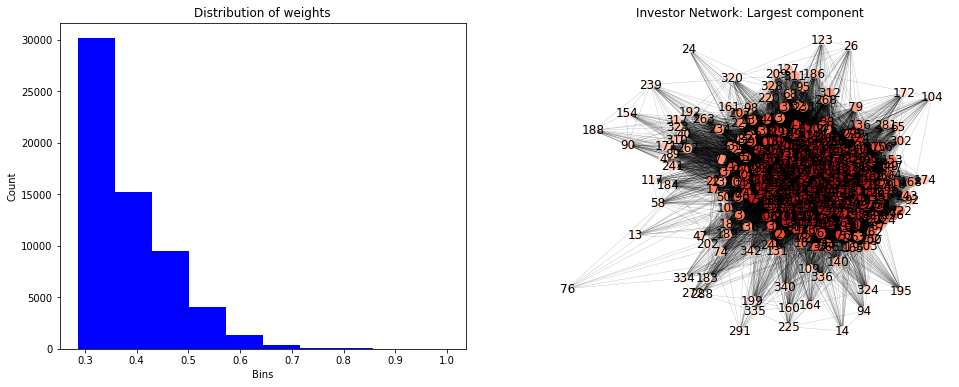

,Investor_degree_centrality,Investor_betweenness_centrality,Investor_closeness_centrality
Bill Gurley,0.825114,0.005598,0.367922
Jim Goetz,0.953132,0.009159,0.408598
Mary Meeker,0.853805,0.002904,0.375955
Peter Fenton,0.844005,0.000188,0.379389
Josh Kopelman,0.138603,0.000000,0.277004


In [7]:
# Investor network feature
inv_nx_df = get_network_centrality(investor_nx_df, 'Investor', 'VectorDistance', 'on')
inv_nx_df.head()

## 3. Merge and Get the Final  Feature DataFrame

In [8]:
invest_data_df = text_feature_df.merge(inv_nx_df, left_on='Investor', right_index=True)
invest_data_df = invest_data_df.merge(dom_nx_df, left_on='Domain', right_index=True)
invest_data_df = invest_data_df.drop(columns='Investor')
# Filter useless data
invest_data_df = invest_data_df[invest_data_df['Money_Raised']!='—']
invest_data_df

,Domain,Money_Raised,posSentNum,negSentNum,posSentScore,negSentScore,Similarity,rakeKeywordsFreq,Time_Interval_Month,Investor_degree_centrality,Investor_betweenness_centrality,Investor_closeness_centrality,Domain_degree_centrality,Domain_betweenness_centrality,Domain_closeness_centrality
0,Dental,$21M,0.495292,0.113622,0.451702,-0.355453,0.059242,0.001997,42,0.825114,0.005598,0.367922,0.795291,0.000010,0.353305
1,Dental,$21M,0.428571,0.128571,0.502273,-0.421981,0.117874,0.008618,19,0.825114,0.005598,0.367922,0.795291,0.000010,0.353305
2,Dental,$21M,0.549528,0.063679,0.502241,-0.327293,0.064146,0.012512,3,0.825114,0.005598,0.367922,0.795291,0.000010,0.353305
3,Dental,$21M,0.466258,0.092025,0.494955,-0.368167,0.088350,0.002132,19,0.825114,0.005598,0.367922,0.795291,0.000010,0.353305
4,Dental,$21M,0.323671,0.149758,0.469031,-0.391197,0.077429,0.013956,15,0.825114,0.005598,0.367922,0.795291,0.000010,0.353305
5,Dental,$21M,0.416667,0.142857,0.436839,-0.410383,0.079218,0.003161,50,0.825114,0.005598,0.367922,0.795291,0.000010,0.353305
6,Dental,$21M,0.452727,0.167273,0.449909,-0.411550,0.094898,0.001113,23,0.825114,0.005598,0.367922,0.795291,0.000010,0.353305
7,Dental,$21M,0.504000,0.074000,0.456931,-0.297249,0.067691,0.010444,90,0.825114,0.005598,0.367922,0.795291,0.000010,0.353305
8,Dental,$21M,0.379475,0.053699,0.484097,-0.345673,0.065819,0.011003,1,0.825114,0.005598,0.367922,0.795291,0.000010,0.353305
2,Dental,£4M,0.255814,0.152824,0.474195,-0.447749,0.050438,0.008503,23,0.238364,0.000000,0.281988,0.795291,0.000010,0.353305


# Model Training and Analysis

In [9]:
# Other packages
import re
import numpy as np
import matplotlib.pyplot as plt
from forex_python.converter import CurrencyRates
# IMachine learning packages
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
# Statistic analysis data
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [10]:
# Unify all the curruncy to US dollars according to exchange rates
def currencyExchange(x):
    """
    Exchange Currucy: foreign exchange rates published by European Central Bank.
    """
    # Change Unit
    num = re.findall('[0-9/.]+', x)[0]
    if 'M' in x:
        res = float(num) * 1000000
    if 'K' in x:
        res = float(num) * 1000
    if 'B' in x:
        res = float(num) * 1000000000
 
    # Currency Exchange
    c = CurrencyRates()
    cur = re.findall('[^0-9/.]+', x)[0]
    if cur == '$':
        pass
    elif cur == '₹':
        res = c.convert('INR', 'USD', res)
    elif cur == '€':
        res = c.convert('EUR', 'USD', res)
    elif cur == 'CA$':
        res = c.convert('CAD', 'USD', res)
    elif cur == '£':
        res = c.convert('GBP', 'USD', res)
    elif cur == 'CN¥':
        res = c.convert('CNY', 'USD', res)
    elif cur == 'SEK':
        res = c.convert('SEK', 'USD', res)
    elif cur == 'SGD':
        res = c.convert('SGD', 'USD', res)
    elif cur == 'CHF':
        res = c.convert('SGD', 'USD', res)
    elif cur == 'A$':
        res = c.convert('AUD', 'USD', res)
    elif cur == 'R$':
        res = c.convert('ZAR', 'USD', res)
    else:
        print(x)
        res = None
    return res

In [11]:
invest_data_df['Money_Raised'] = invest_data_df['Money_Raised'].map(lambda x: currencyExchange(x))
invest_data_df = invest_data_df.dropna()
invest_data_df.head()

,Domain,Money_Raised,posSentNum,negSentNum,posSentScore,negSentScore,Similarity,rakeKeywordsFreq,Time_Interval_Month,Investor_degree_centrality,Investor_betweenness_centrality,Investor_closeness_centrality,Domain_degree_centrality,Domain_betweenness_centrality,Domain_closeness_centrality
0,Dental,21000000.0,0.495292,0.113622,0.451702,-0.355453,0.059242,0.001997,42,0.825114,0.005598,0.367922,0.795291,0.00001,0.353305
1,Dental,21000000.0,0.428571,0.128571,0.502273,-0.421981,0.117874,0.008618,19,0.825114,0.005598,0.367922,0.795291,0.00001,0.353305
2,Dental,21000000.0,0.549528,0.063679,0.502241,-0.327293,0.064146,0.012512,3,0.825114,0.005598,0.367922,0.795291,0.00001,0.353305
3,Dental,21000000.0,0.466258,0.092025,0.494955,-0.368167,0.088350,0.002132,19,0.825114,0.005598,0.367922,0.795291,0.00001,0.353305
4,Dental,21000000.0,0.323671,0.149758,0.469031,-0.391197,0.077429,0.013956,15,0.825114,0.005598,0.367922,0.795291,0.00001,0.353305


## 1. Select Feature According to  Covariance

In [12]:
X = invest_data_df.drop(axis=1, columns=['Money_Raised', 'Domain'])
y = invest_data_df['Money_Raised']

In [13]:
# Visualize co-variance matrix and drop Domain_degree_centrality
X.corr()

,posSentNum,negSentNum,posSentScore,negSentScore,Similarity,rakeKeywordsFreq,Investor_degree_centrality,Investor_betweenness_centrality,Investor_closeness_centrality,Domain_degree_centrality,Domain_betweenness_centrality,Domain_closeness_centrality
posSentNum,1.000000,-0.419153,0.594617,0.550950,0.323957,0.036599,0.067859,0.070283,0.061783,0.001860,-0.002125,0.001218
negSentNum,-0.419153,1.000000,-0.356852,-0.716208,-0.129771,0.011378,-0.012758,-0.007801,-0.007044,-0.001579,0.001179,-0.001408
posSentScore,0.594617,-0.356852,1.000000,0.297554,0.187148,0.006535,0.064363,0.039109,0.058825,0.004538,-0.004206,0.004133
negSentScore,0.550950,-0.716208,0.297554,1.000000,0.228173,0.016093,0.014143,0.059904,0.007612,-0.005097,0.002822,-0.005492
Similarity,0.323957,-0.129771,0.187148,0.228173,1.000000,0.271760,0.049952,0.066137,0.040510,-0.109175,0.100054,-0.108989
rakeKeywordsFreq,0.036599,0.011378,0.006535,0.016093,0.271760,1.000000,0.009773,0.012085,0.006536,-0.018528,0.006525,-0.019257
Investor_degree_centrality,0.067859,-0.012758,0.064363,0.014143,0.049952,0.009773,1.000000,0.197398,0.974995,0.199362,-0.201469,0.194600
Investor_betweenness_centrality,0.070283,-0.007801,0.039109,0.059904,0.066137,0.012085,0.197398,1.000000,0.114014,-0.061525,0.064964,-0.065966
Investor_closeness_centrality,0.061783,-0.007044,0.058825,0.007612,0.040510,0.006536,0.974995,0.114014,1.000000,0.214306,-0.217737,0.209804
Domain_degree_centrality,0.001860,-0.001579,0.004538,-0.005097,-0.109175,-0.018528,0.199362,-0.061525,0.214306,1.000000,-0.980884,0.999500


In [14]:
X = X.drop('Domain_degree_centrality', axis=1)

## 2. Split and Standardize the Feature

In [15]:
# Since features are in different scales, standize it
# Split data into 80% as training set and 20% as test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Standardize training and test data
X_train = ((X_train - X_train.mean()) / X_train.std())
X_test = ((X_test - X_test.mean()) / X_test.std())
y_train = ((y_train - y_train.mean()) / y_train.std())
y_test = ((y_test - y_test.mean()) / y_test.std())

## 3. Train Rigid Regression Model and Tune Parameters by CV

In [16]:
# Define the error function
def funcError(y, y_pred):
    return (y-y_pred)**2
scorer = make_scorer(funcError)
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
cv_result = []

# Simple Rigid regression model
for alpha in alpha_list:
    clf = Ridge(alpha)
    cv_result.append(np.sum(cross_val_score(clf, X_train, y_train, cv=5)))
    
# Find the best hyperparameter
alpha = alpha_list[np.argmin(cv_result)]
clf = Ridge(alpha=alpha)
clf.fit(X_train, y_train)

# Prediction
y_pred = clf.predict(X_test)
print("The best alpha parameter is {}.".format(alpha))
print("The R2 score of the linear model is {:.3f}".format(r2_score(y_test, y_pred)))

The best alpha parameter is 100.
The R2 score of the linear model is 0.047


### Deep Analysis Using Statistics Package

In [17]:
X_train_ = sm.add_constant(X_train)
OLSmodel = sm.OLS(y_train, X_train_.astype(float))
est = OLSmodel.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:           Money_Raised   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     135.4
Date:                Fri, 07 Jun 2019   Prob (F-statistic):               0.00
Time:                        21:04:39   Log-Likelihood:                -43134.
No. Observations:               30957   AIC:                         8.629e+04
Df Residuals:                   30944   BIC:                         8.640e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [18]:
# Drop features that might have negative effect or cannot reject null hypothesis
OLSmodel = sm.OLS(y_train, X_train_.drop(['posSentNum', 'negSentNum', 'negSentScore', 'Similarity', 'rakeKeywordsFreq', 'Investor_degree_centrality'], axis=1).astype(float))
# See the result
est = OLSmodel.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:           Money_Raised   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     260.7
Date:                Fri, 07 Jun 2019   Prob (F-statistic):               0.00
Time:                        21:04:39   Log-Likelihood:                -43162.
No. Observations:               30957   AIC:                         8.634e+04
Df Residuals:                   30950   BIC:                         8.640e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

## 4. Random Forest and Tune Parameter by CV

In [19]:
def funcError(y, y_pred):
    return (y-y_pred)**2
scorer = make_scorer(funcError)

n_ests = np.array([10, 30, 50, 70, 90, 100])
max_deps = np.array([3, 5, 7, 9, 11])
cv_result = np.inf
aim_est, aim_deps = n_ests[0], max_deps[0]

# Simple Rigid regression model
for est in n_ests:
    for dep in max_deps: 
        clf = RandomForestRegressor(max_depth=dep, random_state=0, n_estimators=est)
        temp = np.sum(cross_val_score(clf, X_train, y_train, cv=5))
        if temp < cv_result:
            cv_result = temp
            aim_est = est
            aim_deps = dep
            
# Find the best hyperparameter
clf = RandomForestRegressor(max_depth=aim_deps, random_state=0, n_estimators=aim_est)
clf.fit(X_train, y_train)

# Predict and calculate R2 Score
y_pred = clf.predict(X_test)
print("The best Deps: {} and Ests: {}.".format(aim_deps, aim_est))
print('R2_score:', r2_score(y_test, y_pred))

The best Deps: 3 and Ests: 10.
R2_score: 0.07682861942863917


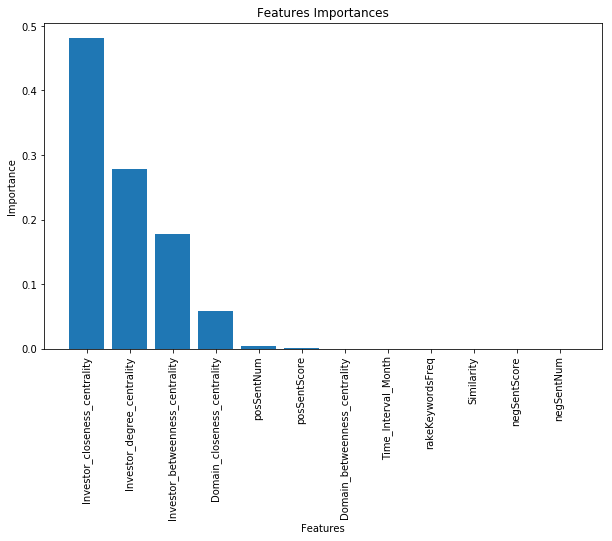

In [20]:
# Plot the importance of features
Importace = clf.feature_importances_[np.argsort(clf.feature_importances_)[::-1]]
feaImportace = np.array(X_train.columns)[np.argsort(clf.feature_importances_)[::-1]]

plt.figure(figsize=(10,6))
# Make a bar chart
plt.bar(range(len(Importace)), Importace, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(range(len(Importace)), feaImportace, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance')
plt.xlabel('Features')
plt.title('Features Importances')
plt.savefig('Features_Importances.png',dpi=300)
plt.show()

## 5. Deep Learning with Rigid Regression

In [21]:
import torch
from torch import nn
from torch import optim
from torch.nn import functional as F

In [22]:
class LinearNet(nn.Module):
    '''
        Fully connected linear network with sigmoid activation function.
    '''
    def __init__(self, inpDim):
        super(LinearNet, self).__init__()
        self.nb_hidden1 = 128
        self.outDim = 64
        self.fc1 = nn.Linear(inpDim, self.nb_hidden1)
        self.fc2 = nn.Linear(self.nb_hidden1, self.outDim)
        self.regression = nn.Linear(self.outDim, 1)
        self.bn1 = nn.BatchNorm1d(self.nb_hidden1)
        self.bn2 = nn.BatchNorm1d(self.outDim)
        
    def forward(self, x):
        x = self.fc1(x)
#         print(x)
        x = F.relu(self.bn1(x))
        x = self.fc2(x)
        x = torch.sigmoid(self.bn2(x))
        x = self.regression(x)
        return x
    
def trainLinearNet(model, train_input, train_target, mini_batch_size):
    '''
        Set the training parameter and train the model. 
    '''
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr = 1e-4)
    nb_epochs = 15
    lambda_l2 = 0.1
    for e in range(nb_epochs):
        for b in range(0, train_input.size(0), mini_batch_size):
            mini_batch_size = min(mini_batch_size, train_input.size(0) - b)
            output = model(train_input.narrow(0, b, mini_batch_size))
            loss = criterion(output, train_target.narrow(0, b, mini_batch_size))
            # Add L2 regularization
            for p in model.parameters():
                loss += lambda_l2 * p.pow(2).sum()
            model.zero_grad()
            loss.backward()
            optimizer.step()
        print('At ', e, 'epoch, loss is ', loss.item())
        
def compute_errors_trainLinearNet(model, data_input, data_target):
    '''
        Compute error or loss.
    '''
    criterion = nn.MSELoss()
    nb_data_errors = 0
    lambda_l2 = 0.1
    output = model(data_input)
    nb_data_errors = criterion(output, data_target)
    for p in model.parameters():
        nb_data_errors += lambda_l2 * p.pow(2).sum()    
    return nb_data_errors

In [23]:
X_train_t = torch.from_numpy(X_train.values.astype('float32'))
X_test_t = torch.from_numpy(X_test.values.astype('float32'))
y_train_t = torch.from_numpy(y_train.values.astype('float32')).view(-1, 1)
y_test_t = torch.from_numpy(y_test.values.astype('float32')).view(-1, 1)

In [24]:
model = LinearNet(X_train_t.size()[1])
mini_batch_size = 100
trainLinearNet(model, X_train_t, y_train_t, mini_batch_size)

At  0 epoch, loss is  13.778618812561035
At  1 epoch, loss is  13.31151294708252
At  2 epoch, loss is  10.759672164916992
At  3 epoch, loss is  7.156436443328857
At  4 epoch, loss is  4.7801055908203125
At  5 epoch, loss is  3.2082996368408203
At  6 epoch, loss is  2.1682727336883545
At  7 epoch, loss is  1.4799507856369019
At  8 epoch, loss is  1.0244077444076538
At  9 epoch, loss is  0.7226731777191162
At  10 epoch, loss is  0.5223158001899719
At  11 epoch, loss is  0.389560729265213
At  12 epoch, loss is  0.3016044497489929
At  13 epoch, loss is  0.24313102662563324
At  14 epoch, loss is  0.20397713780403137


In [25]:
# However, even worse
y_pred = model(X_test_t).detach().numpy().squeeze()
print('R2_score:', r2_score(y_test, y_pred))

R2_score: 0.002628984381865318
